In [1]:
import pandas as pd
import numpy as np

# PLOTTING

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Plot exemplary feature representations for two different cell types 

In [2]:
cell1 = 393
cell2 = 557

type1='CBC1'
type2='CBC5O'

In [3]:
sns.set_context('paper', font_scale=1.8)
colors = sns.color_palette('Blues_d',4)
color1 = (0,151/255, 167/255)
color2 = (152/255, 0, 0)

### Density maps

In [5]:
data = pd.read_csv("./data/features/statistic_id_7_full.csv", index_col=[0,1,2]).T

([], <a list of 0 Text yticklabel objects>)

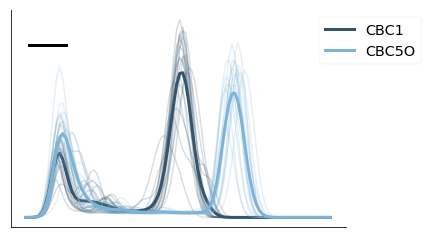

In [6]:
plt.plot(data['CBC1'],c=colors[0], alpha=0.2)
plt.plot(data['CBC1'].mean(axis=1),c=colors[0], label='CBC1', linewidth=3)
plt.plot(data['CBC5O'],c=colors[3], alpha=0.2)
plt.plot(data['CBC5O'].mean(axis=1),c=colors[3], label='CBC5O', linewidth=3)


min_z = 0.1
max_z = 82.85

plt.plot([1, 1 + 10/(max_z-min_z)*100],[7,7], c='k', linewidth=3, alpha=1)
sns.despine()
plt.legend(bbox_to_anchor=(0.9,1.0))
plt.xticks([])
plt.yticks([])

In [7]:
# XZ density maps
data = pd.read_csv("./data/features/statistic_id_5_full.csv", index_col=[0,1,2] ).T

In [8]:
min_ = np.array([-51.671, -42.935, -31.275])

max_ = np.array([66.77256338, 57.38123944, 51.475])
range_ = (max_ - min_)

e = np.max((np.abs(min_), np.abs(max_)), axis=0)

Text(0, 0.5, 'Height [µm]')

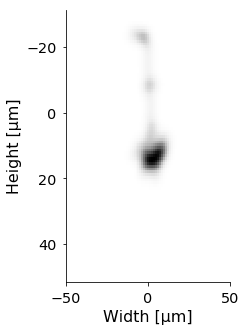

In [9]:
plt.figure(figsize=(5,5))
plt.imshow(data['CBC1'][cell1].values.reshape((100,100)).T, cmap='Greys', extent=[min_[0],max_[0], max_[2],min_[2]], aspect=2)
plt.grid(False)
sns.despine()
plt.xlim([-50,50])
#plt.ylim([50,-20])
plt.gca().set_yticks([40,20,0,-20])
plt.xlabel('Width [µm]')
plt.ylabel('Height [µm]')

Text(0, 0.5, 'Height [µm]')

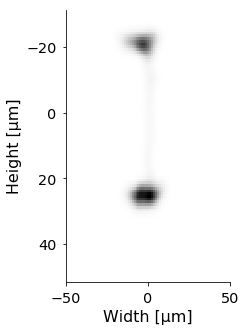

In [10]:
plt.figure(figsize=(5,5))
plt.imshow(data['CBC5O'][cell2].values.reshape((100,100)).T, cmap='Greys', extent=[min_[0],max_[0], max_[2],min_[2]], aspect=2)
sns.despine()
plt.xlim([-50,50])
#plt.ylim([50,-20])
plt.gca().set_yticks([40,20,0,-20])

plt.grid(False)
plt.xlabel('Width [µm]')
plt.ylabel('Height [µm]')


## Morphometry

In [11]:
from scipy.stats import zscore

In [12]:
data = pd.read_csv("./data/features/statistic_id_80_full.csv", index_col=[0,1,2] ).T

type_index_1 = data.columns.get_level_values('type') == 'CBC1' 
type_index_2 = data.columns.get_level_values('type') == 'CBC5O' 

type_1_count = data['CBC1'].shape[1]
selected_type_data = np.concatenate((data['CBC1'].values, data['CBC5O'].values), axis=1)

In [13]:
idx = [2,10, 7, 0,1,3,12, 11, 6, 8]
xlabels = ['Height', 'Max. \n neurite \n length', 'Total \n length', 'Branch \n points', 'Tips', 'Width', 
           'Max. \n segment \n length', 
          'Max. \n branch \n order', 'Mean \n thickness', 'Total \n surface']

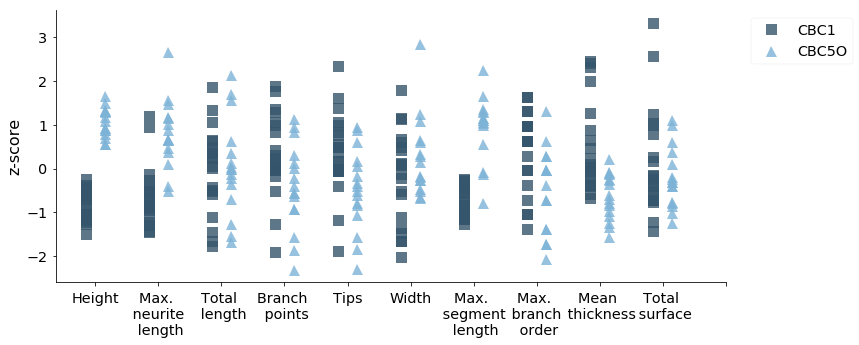

In [15]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1)

ax.plot(np.array(range(len(xlabels))) - .15, zscore(selected_type_data, axis=1)[idx,:type_1_count], c=colors[0], ls='none', marker='s', markersize=11, alpha=.8, label='CBC1')
ax.plot(np.array(range(len(xlabels))) + .15,zscore(selected_type_data,axis=1)[idx,type_1_count:], c=colors[3], ls='none', marker='^', markersize=11, alpha=.8, label='CBC5O')

sns.despine()
plt.grid(True)

handles, _ = ax.get_legend_handles_labels()
plt.legend([handles[0]] + [handles[-3]], ['CBC1', 'CBC5O'],bbox_to_anchor=(1.2,1.))
plt.ylabel('z-score')
plt.grid(False)
_ = plt.xticks(range(11))
_ = plt.gca().set_xticklabels(xlabels)


## Morphometry distribution

Path angle vs path distance

path angle distribution AND 

sholl intersection yz

In [16]:
# path angle vs path distance
data = pd.read_csv("./data/features/statistic_id_56_full.csv", index_col=[0,1,2] ).T

bin_edges_1 = np.linspace(0,65.2717,num=20)

xlabels= [0,20,40,60]
x_ticks = [np.where((bin_edges_1 <= k ))[0][-1] for k in xlabels]


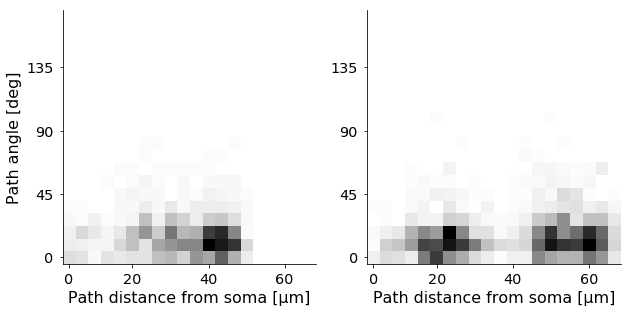

In [17]:
plt.figure(figsize=(10,5))
ax = plt.subplot(1,2,1)
plt.imshow(data['CBC1'][393].values.reshape((20,20)).T, cmap='Greys')
plt.gca().invert_yaxis()
plt.ylabel('Path angle [deg]')
plt.xlabel('Path distance from soma [µm]')
plt.grid(False)
sns.despine()

plt.gca().set_yticks(range(0,20,5))
plt.gca().set_yticklabels(range(0,181,45))

plt.gca().set_xticks(x_ticks)
plt.gca().set_xticklabels(xlabels)

plt.subplot(1,2,2, sharey=ax, sharex=ax)
plt.imshow(data['CBC5O'][557].values.reshape((20,20)).T, cmap='Greys')
plt.gca().invert_yaxis()
#plt.ylabel('Path angle [deg]')
plt.xlabel('Path distance from soma [µm]')
plt.grid(False)
sns.despine()


#### Scatter plot of the PCA components

In [18]:
from sklearn.decomposition import PCA

In [19]:
selected_data = np.concatenate((data['CBC1'].values,data['CBC5O'].values), axis=1)
pca = PCA(n_components=2,copy=True, whiten=False)

pca_data = pca.fit_transform(selected_data.T)

Text(0, 0.5, 'PC 2 (a.u.)')

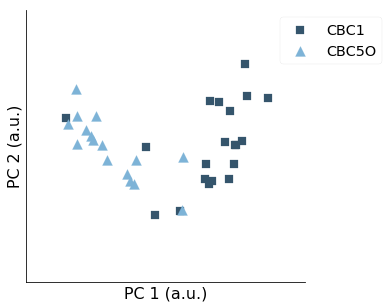

In [21]:
plt.figure(figsize=(5,5))
plt.scatter(pca_data[:20,0], pca_data[:20,1], c=[colors[0]], label='CBC1', marker = 's', s=60)
plt.scatter(pca_data[20:,0], pca_data[20:,1], c=[colors[3]], label='CBC5O',marker='^', s=100)



sns.despine()
plt.legend(frameon=True, bbox_to_anchor=(1.3,1.))
plt.xlim([-0.004,0.004])
plt.ylim([-0.004,0.004])
plt.yticks([])
plt.xticks([])
plt.grid(False)
plt.xlabel('PC 1 (a.u.)')
plt.ylabel('PC 2 (a.u.)')


#### Path angle distribution

In [22]:
data = pd.read_csv("./data/features/statistic_id_54_full.csv", index_col=[0,1,2] ).T

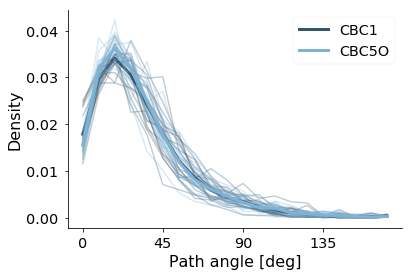

In [23]:
plt.figure(figsize=(6,4))
plt.plot(data['CBC1'],c=colors[0], alpha=0.3)
plt.plot(data['CBC1'].mean(axis=1),c=colors[0], linewidth=3, label='CBC1')
plt.plot(data['CBC5O'],c=colors[3], alpha=0.3)
plt.plot(data['CBC5O'].mean(axis=1),c=colors[3], linewidth=3,label='CBC5O')
plt.gca().set_xticks(range(0,20,5))
plt.gca().set_xticklabels(range(0,181,45))
sns.despine()

plt.ylabel('Density')
plt.xlabel('Path angle [deg]')
plt.grid(False)
plt.legend(frameon=True)


#### Sholl intersection profile yz

In [24]:
data = pd.read_csv("./data/features/statistic_id_63_full.csv", index_col=[0,1,2] ).T

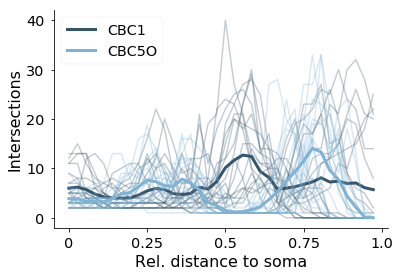

In [25]:
plt.figure(figsize=(6,4))
plt.plot(data['CBC1'].values,c=colors[0], alpha=0.3)
plt.plot(data['CBC1'].values.mean(axis=1),c=colors[0], linewidth=3, label='CBC1')
plt.plot(data['CBC5O'].values,c=colors[3], alpha=0.3)
plt.plot(data['CBC5O'].values.mean(axis=1),c=colors[3], linewidth=3, label='CBC5O')

sns.despine()
plt.gca().set_xticks(range(0,37, 9))
plt.gca().set_xticklabels([0, .25,.5,.75,1.])
plt.ylabel('Intersections')
plt.xlabel('Rel. distance to soma')
plt.legend(frameon=True)
plt.grid(False)


### Persistence

In [26]:
data = pd.read_csv("./data/features/statistic_id_71_full.csv", index_col=[0,1,2] ).T

xmax = 143
ymax = 133


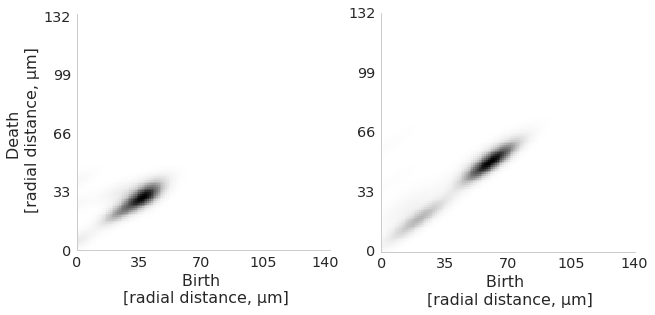

In [28]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
ax = plt.subplot(1,2,1)
plt.imshow(data['CBC1'][cell1].values.reshape(100,100), cmap='Greys')

plt.gca().set_xticks(range(0,int(xmax),35))
plt.gca().set_xticklabels(range(0,int(xmax),35))

plt.gca().set_yticks(range(0,int(ymax),33))
plt.gca().set_yticklabels(range(0,int(ymax),33))

plt.xlim([0,xmax])
plt.ylim([0,ymax])
plt.grid(False)
plt.ylabel('Death \n [radial distance, µm]')
plt.xlabel('Birth \n [radial distance, µm]')

plt.subplot(1,2,2)
plt.imshow(data['CBC5O'][cell2].values.reshape(100,100), cmap='Greys')
plt.grid(False)
sns.despine()
plt.gca().invert_yaxis()
plt.gca().set_xticks(range(0,int(xmax),35))
plt.gca().set_xticklabels(range(0,int(xmax),35))

plt.gca().set_yticks(range(0,int(ymax),33))
plt.gca().set_yticklabels(range(0,int(ymax),33))


plt.xlabel('Birth \n [radial distance, µm]')
sns.despine()


#### PCA components

In [29]:
from sklearn.decomposition import PCA

In [30]:
selected_data = np.concatenate((data['CBC1'].values,data['CBC5O'].values), axis=1)
pca = PCA(n_components=2,copy=True, whiten=False)

pca_data = pca.fit_transform(selected_data.T)

([], <a list of 0 Text yticklabel objects>)

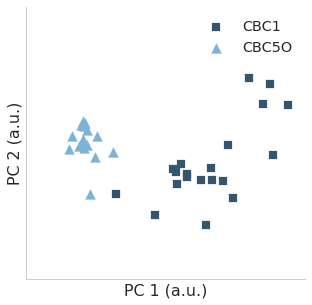

In [32]:
plt.figure(figsize=(5,5))

plt.scatter(pca_data[:20,0], pca_data[:20,1], c=[colors[0]], label='CBC1', marker = 's', s=60)
plt.scatter(pca_data[20:,0], pca_data[20:,1], c=[colors[3]], label='CBC5O',marker='^', s=100)

sns.despine()
plt.legend()
plt.xlim([-0.06,0.07])
plt.ylim([-0.06,0.07])
plt.grid(False)
plt.xlabel('PC 1 (a.u.)')
plt.ylabel('PC 2 (a.u.)')
plt.xticks([])
plt.yticks([])


### Graph motifs

In [33]:
data = pd.read_csv("./data/features/statistic_id_13_full.csv", index_col=[0,1,2] ).T

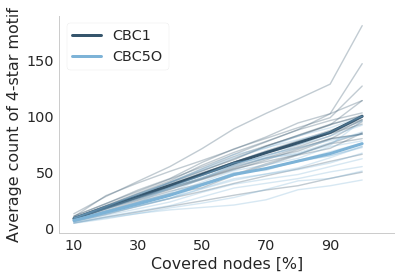

In [34]:
plt.figure(figsize=(6,4))
plt.plot(data['CBC1'],c=colors[0], alpha=0.3)
plt.plot(data['CBC1'].mean(axis=1),c=colors[0],linewidth=3, label='CBC1')
plt.plot(data['CBC5O'],c=colors[3], alpha=0.3)
plt.plot(data['CBC5O'].mean(axis=1),c=colors[3],linewidth=3, label='CBC5O')
plt.gca().set_xticks(range(0,11,2))
plt.gca().set_xticklabels(range(10,101,20))
sns.despine()
plt.grid(False)
plt.ylabel('Average count of 4-star motif')
plt.xlabel('Covered nodes [%]')
plt.legend(frameon=True)
